# Iris Dataset With K-Nearest Neighbors

In [1]:
import pandas
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_dataset = pandas.read_csv("Machine Learning Data Set/iris.csv")
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris_dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
labels = iris_dataset['species']
iris_dataset.drop(['species'], axis=1, inplace=True)
values = iris_dataset.values

In [5]:
train_values, test_values, train_labels, test_labels = \
train_test_split(values, labels, stratify=labels, random_state=42)

In [6]:
knn_clasifier = KNeighborsClassifier()
knn_clasifier.fit(train_values, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
print("Accuracy with 5 neighbors on training set: {:.3f}".format(knn_clasifier.score(train_values, train_labels)))
print("Accuracy with 5 neighbors on test set: {:.3f}".format(knn_clasifier.score(test_values, test_labels)))

Accuracy with 5 neighbors on training set: 0.973
Accuracy with 5 neighbors on test set: 0.974


In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = dict(n_neighbors = list(range(2, 21)))
cross_valid = GridSearchCV(knn_clasifier, param_grid, cv=5, scoring='accuracy')

In [10]:
cross_valid.fit(train_values, train_labels);

In [11]:
print('Best parameter for nearest neighbors classifier: {parameter}.\n\
Highest score on cross validation: {score:.3f}'.format(parameter=cross_valid.best_params_['n_neighbors'], 
                                                score=cross_valid.best_score_))

Best parameter for nearest neighbors classifier: 11.
Highest score on cross validation: 0.973


In [14]:
cross_valid_results = pandas.DataFrame(cross_valid.cv_results_)
cross_valid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006206,0.001824,0.004793,0.001969,2,{'n_neighbors': 2},0.916667,0.958333,0.909091,1.000000,...,0.937500,0.035748,18,0.965909,0.988636,1.000000,0.978022,0.989011,0.984316,0.011534
1,0.003725,0.000780,0.004525,0.001763,3,{'n_neighbors': 3},1.000000,0.958333,0.909091,1.000000,...,0.955357,0.041269,6,0.943182,0.954545,0.988889,0.956044,0.967033,0.961939,0.015450
2,0.006067,0.000825,0.005066,0.000911,4,{'n_neighbors': 4},0.916667,0.958333,0.909091,0.952381,...,0.928571,0.022523,19,0.954545,0.965909,1.000000,0.956044,0.967033,0.968706,0.016436
3,0.007300,0.001626,0.005688,0.001018,5,{'n_neighbors': 5},0.958333,1.000000,0.909091,1.000000,...,0.955357,0.041269,6,0.965909,0.954545,1.000000,0.967033,0.978022,0.973102,0.015366
4,0.006893,0.002126,0.008545,0.001922,6,{'n_neighbors': 6},0.916667,1.000000,0.909091,1.000000,...,0.946429,0.044071,13,0.965909,0.954545,1.000000,0.967033,0.978022,0.973102,0.015366
5,0.004603,0.001077,0.006481,0.002546,7,{'n_neighbors': 7},0.958333,1.000000,0.909091,1.000000,...,0.964286,0.033839,2,0.965909,0.954545,0.988889,0.967033,0.978022,0.970880,0.011676
6,0.005261,0.001382,0.004749,0.001346,8,{'n_neighbors': 8},0.958333,1.000000,0.909091,1.000000,...,0.955357,0.041269,6,0.977273,0.965909,0.977778,0.967033,0.989011,0.975401,0.008420
7,0.004906,0.001201,0.007543,0.001915,9,{'n_neighbors': 9},0.958333,1.000000,0.909091,1.000000,...,0.964286,0.033839,2,0.965909,0.977273,0.988889,0.956044,0.989011,0.975425,0.012926
8,0.006636,0.000942,0.005924,0.001965,10,{'n_neighbors': 10},0.958333,0.958333,0.954545,1.000000,...,0.964286,0.017308,2,0.977273,0.988636,0.988889,0.956044,0.989011,0.979971,0.012776
9,0.007302,0.003283,0.006428,0.002145,11,{'n_neighbors': 11},0.958333,1.000000,0.954545,1.000000,...,0.973214,0.022036,1,0.965909,0.988636,0.988889,0.956044,0.989011,0.977698,0.014005


In [15]:
cross_valid_represent_train = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_train_score']]
cross_valid_represent_train

,param_n_neighbors,mean_train_score
0,2,0.984316
1,3,0.961939
2,4,0.968706
3,5,0.973102
4,6,0.973102
5,7,0.970880
6,8,0.975401
7,9,0.975425
8,10,0.979971
9,11,0.977698


In [16]:
cross_valid_represent_test = cross_valid_results.loc[0:, ['param_n_neighbors', 'mean_test_score']]
cross_valid_represent_test

,param_n_neighbors,mean_test_score
0,2,0.937500
1,3,0.955357
2,4,0.928571
3,5,0.955357
4,6,0.946429
5,7,0.964286
6,8,0.955357
7,9,0.964286
8,10,0.964286
9,11,0.973214


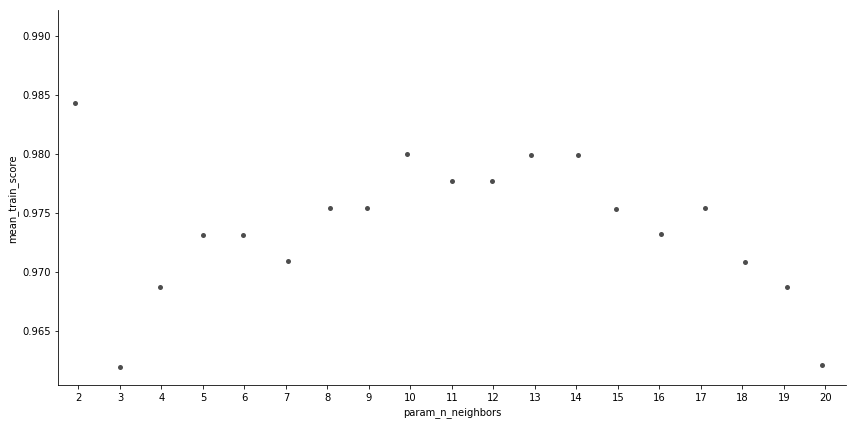

In [17]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (12, 8)
seaborn.catplot(x='param_n_neighbors', y='mean_train_score', 
                data=cross_valid_represent_train, color='.3', 
                height=6, aspect=2);

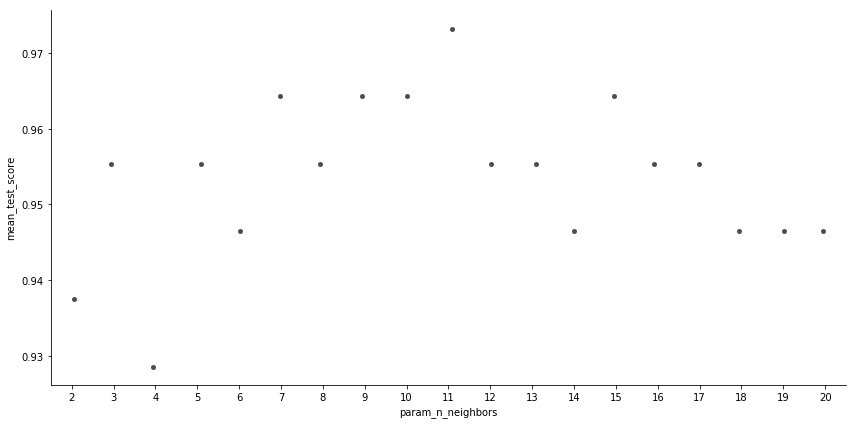

In [18]:
seaborn.catplot(x='param_n_neighbors', y='mean_test_score', 
                data=cross_valid_represent_test, color='.3', 
                height=6, aspect=2);